## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [14]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [32]:
%matplotlib inline

import math

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

<IPython.core.display.Javascript object>

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [5]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categorical variables that are correlated, keep the one with fewer unique categories.

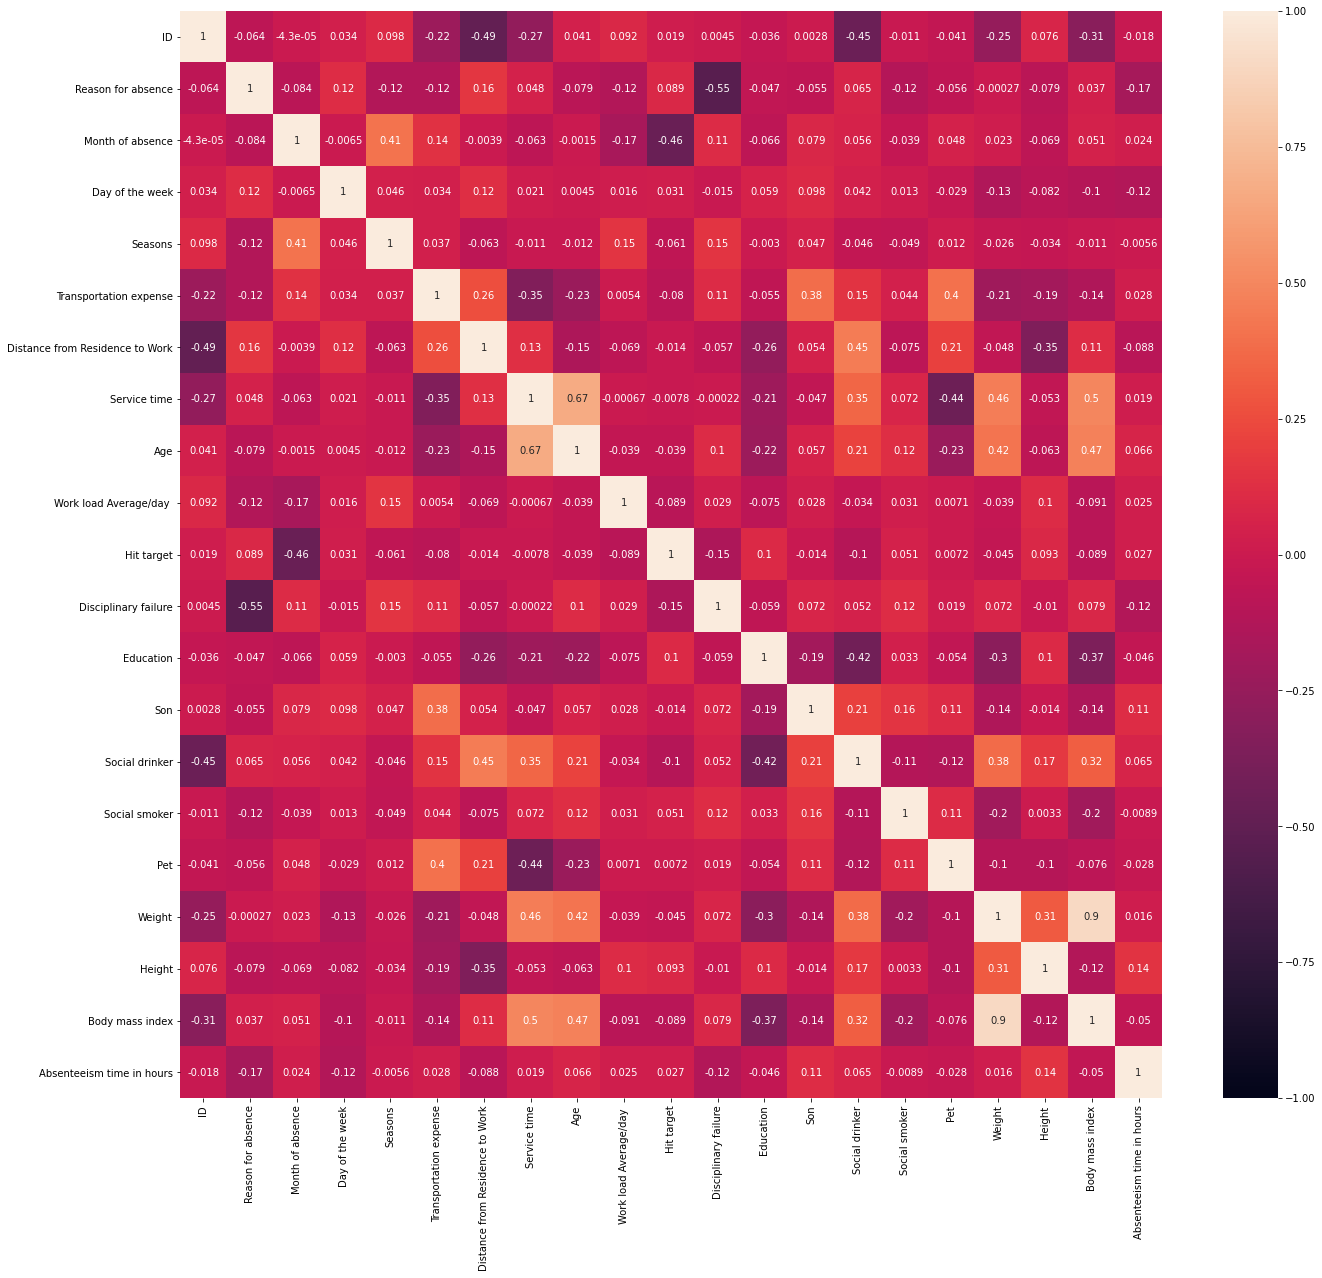

In [7]:
# answer below:
plt.figure(figsize=(22,20))
sns.heatmap(absent.corr(),vmin=-1,vmax=1,annot=True)

throw out weight, Reason for absence, age

def clean_cols_names(names):
    return names.tolower().replace(' ', '_')

In [13]:
#absent["Service time"].value_counts()
absent["Age"].value_counts()

28    117
38    113
37     78
40     58
33     51
36     50
30     46
50     37
41     34
34     29
47     24
43     24
31     22
32     13
58      8
39      8
29      7
27      7
48      6
49      5
46      2
53      1
Name: Age, dtype: int64

In [28]:
# absent = absent.drop(columns=["Age", "Weight", "Reason for absence"])
absent = absent.drop(columns=["ID"])

<IPython.core.display.Javascript object>

Find out which columns contain categorical variables and turn those into dummy variables.

In [29]:
absent.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
0,7,3,1,289,36,13,239.554,97,0,1,2,1,0,1,172,30,4
1,7,3,1,118,13,18,239.554,97,1,1,1,1,0,0,178,31,0
2,7,4,1,179,51,18,239.554,97,0,1,0,1,0,0,170,31,2
3,7,5,1,279,5,14,239.554,97,0,1,2,1,1,0,168,24,4
4,7,5,1,289,36,13,239.554,97,0,1,2,1,0,1,172,30,2


<IPython.core.display.Javascript object>

In [26]:
absent.shape

(740, 18)

<IPython.core.display.Javascript object>

Split the data into train and test with test containing 20% of the data.

In [46]:
# answer below:
y = absent["Absenteeism time in hours"]
X = absent.drop(columns=["Absenteeism time in hours"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, index=y_train.index, columns=X.columns)
X_test = pd.DataFrame(X_test, index=y_test.index, columns=X.columns)

<IPython.core.display.Javascript object>

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

<IPython.core.display.Javascript object>

Train a KNN regression model using k=15 and compute the MSE for the training and test subsamples.

In [0]:
# answer below

In [47]:
knn = KNeighborsRegressor(n_neighbors=15)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

errors = y_pred - y_test

sq_errors = errors ** 2

mse = sq_errors.mean()

print(mse)

179.4264264264264


<IPython.core.display.Javascript object>

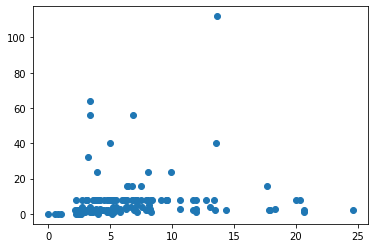

<IPython.core.display.Javascript object>

In [48]:
plt.scatter(y_pred, y_test)